In [2]:
import numpy as np
#from google.colab import drive
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rperi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
import pandas as pd
beauty_df = pd.read_csv('processed_beauty_data.csv')
fashion_df  = pd.read_csv('fashion_reviews.csv')
beauty_df=beauty_df.dropna()

# Beauty section



In [4]:
# First of all apply and Train Word2Vec model to the dataset
import gensim

# Ensure all values in 'text' column are strings
beauty_df['text'] = beauty_df['text'].astype(str)

# Prepare the corpus for Word2Vec model
corpus = [word_tokenize(review) for review in beauty_df['text'].tolist()]

# Train the Word2Vec model
word2vec_model = gensim.models.Word2Vec(corpus, vector_size=100, window=5, min_count=1, workers=4)

# Function to get the average embedding of a review
def get_embedding(text):
    tokens = word_tokenize(text)
    embeddings = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)

beauty_df['embedding'] = beauty_df['text'].apply(get_embedding)

In [5]:
from sklearn.model_selection import train_test_split
X = np.array(beauty_df['embedding'].tolist())
y = np.array(beauty_df['rating'].tolist())

# Reshape X to be 3D [samples, timesteps, features] if necessary


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes

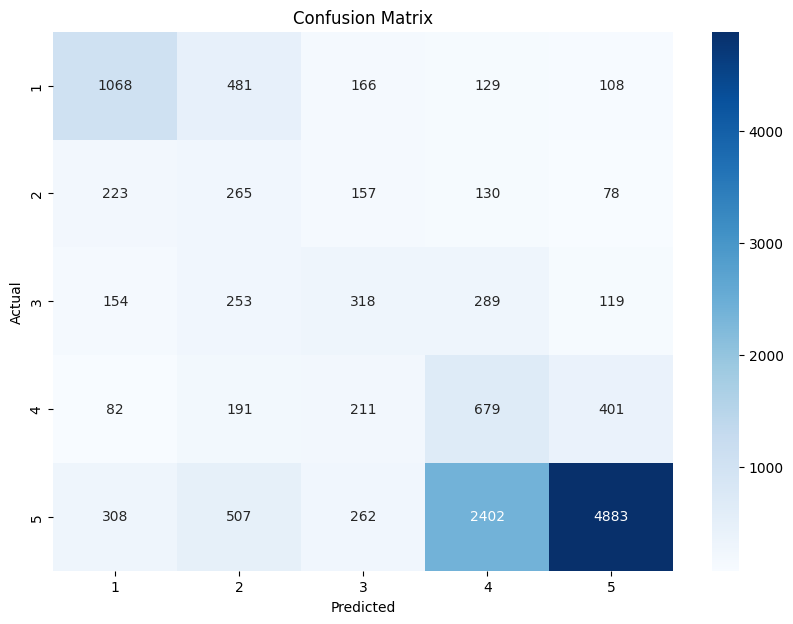

Precision: 0.6629449415054676
Accuracy: 0.520268320830929
Recall: 0.520268320830929
F1 Score: 0.5670477607192491


In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import seaborn as sns
# Initialize and train the Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred.round())

# Calculate precision, accuracy, recall, and F1 score
precision = precision_score(y_test, y_pred.round(), average='weighted')
accuracy = accuracy_score(y_test, y_pred.round())
recall = recall_score(y_test, y_pred.round(), average='weighted')
f1 = f1_score(y_test, y_pred.round(), average='weighted')

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix,xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5], annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("Precision:", precision)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)

In [7]:
# Test 2: Predict ratings for new reviews in the fashion dataset and analyze the results
new_reviews = [
    "try used yes carrot past good product thanks much",  # 5 star
    "good getting ready day ok bed hair brush good getting ready day made fine hair lose volume pep similar hair static without shock",  # 3 stars
    "ca use used couple different eyelash shampoo one burn eye even completely closed little bit might get hurt bad",  # 1 stars
    "really look pictured overly really look pictured overly thick root end shorter much much shown color shown basically white base purple tint white strand mixed made color really pop",  # 2 star
    "lasted couple month worked fine couple month shaved started screening loudly turned turn back would work normally second defending noise seems like one blade may gotten bent misplaced somehow never issue used plenty electric share" # 1 star
    ]

new_embeddings = [get_embedding(review) for review in new_reviews]

# Reshape the embeddings
X_new = np.array(new_embeddings).reshape(len(new_reviews), 100)

predicted_ratings = nb_model.predict(X_new)
print("Predicted Ratings for New Reviews:")
for i, rating in enumerate(predicted_ratings):
  print(f"Review {i+1}: {rating}") # Access the rating directly, it's not nested in an array

Predicted Ratings for New Reviews:
Review 1: 4.0
Review 2: 4.0
Review 3: 2.0
Review 4: 3.0
Review 5: 2.0


# Random Forest

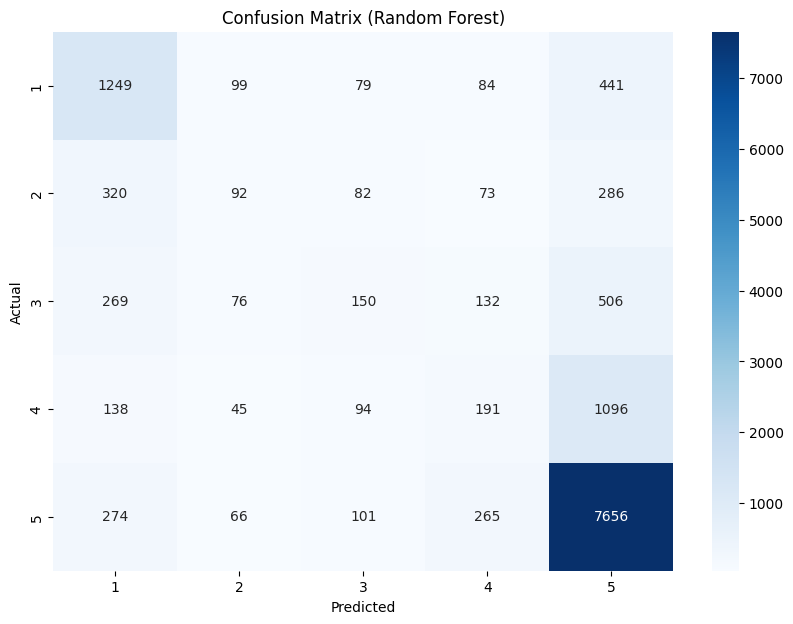

Random Forest - Precision: 0.6087414367149101
Random Forest - Accuracy: 0.6735429890363531
Random Forest - Recall: 0.6735429890363531
Random Forest - F1 Score: 0.6298898136382173


In [8]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=10,random_state=42)  # You can adjust hyperparameters here
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Calculate precision, accuracy, recall, and F1 score
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf, xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5], annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

print("Random Forest - Precision:", precision_rf)
print("Random Forest - Accuracy:", accuracy_rf)
print("Random Forest - Recall:", recall_rf)
print("Random Forest - F1 Score:", f1_rf)

In [9]:
# Test 2: Predict ratings for new reviews in the fashion dataset and analyze the results
new_reviews = [
    "try used yes carrot past good product thanks much",  # 5 star
    "good getting ready day ok bed hair brush good getting ready day made fine hair lose volume pep similar hair static without shock",  # 3 stars
    "ca use used couple different eyelash shampoo one burn eye even completely closed little bit might get hurt bad",  # 1 stars
    "really look pictured overly really look pictured overly thick root end shorter much much shown color shown basically white base purple tint white strand mixed made color really pop",  # 2 star
    "lasted couple month worked fine couple month shaved started screening loudly turned turn back would work normally second defending noise seems like one blade may gotten bent misplaced somehow never issue used plenty electric share" # 1 star
    ]

new_embeddings = [get_embedding(review) for review in new_reviews]

# Reshape the embeddings
X_new = np.array(new_embeddings).reshape(len(new_reviews), 100)

predicted_ratings = rf_model.predict(X_new)
print("Predicted Ratings for New Reviews:")
for i, rating in enumerate(predicted_ratings):
  print(f"Review {i+1}: {rating}") # Access the rating directly, it's not nested in an array

Predicted Ratings for New Reviews:
Review 1: 5.0
Review 2: 3.0
Review 3: 1.0
Review 4: 2.0
Review 5: 1.0


# Logistic Regression


c:\Users\rperi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


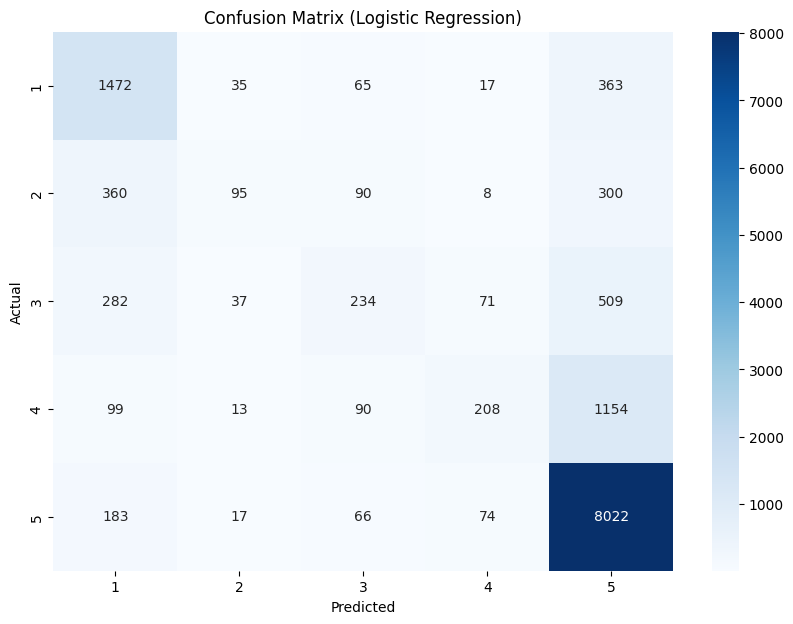

Logistic Regression - Precision: 0.6809041601698107
Logistic Regression - Accuracy: 0.723528563185228
Logistic Regression - Recall: 0.723528563185228
Logistic Regression - F1 Score: 0.6706258214309302


In [10]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, multi_class='multinomial') # Increased max_iter
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Calculate the confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Calculate precision, accuracy, recall, and F1 score
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
accuracy_lr = accuracy_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_lr, xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5], annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

print("Logistic Regression - Precision:", precision_lr)
print("Logistic Regression - Accuracy:", accuracy_lr)
print("Logistic Regression - Recall:", recall_lr)
print("Logistic Regression - F1 Score:", f1_lr)

In [11]:
# Test 2: Predict ratings for new reviews in the fashion dataset and analyze the results
new_reviews = [
    "try used yes carrot past good product thanks much",  # 5 star
    "good getting ready day ok bed hair brush good getting ready day made fine hair lose volume pep similar hair static without shock",  # 3 stars
    "ca use used couple different eyelash shampoo one burn eye even completely closed little bit might get hurt bad",  # 1 stars
    "really look pictured overly really look pictured overly thick root end shorter much much shown color shown basically white base purple tint white strand mixed made color really pop",  # 2 star
    "lasted couple month worked fine couple month shaved started screening loudly turned turn back would work normally second defending noise seems like one blade may gotten bent misplaced somehow never issue used plenty electric share" # 1 star
    ]

new_embeddings = [get_embedding(review) for review in new_reviews]

# Reshape the embeddings
X_new = np.array(new_embeddings).reshape(len(new_reviews), 100)

predicted_ratings = lr_model.predict(X_new)
print("Predicted Ratings for New Reviews:")
for i, rating in enumerate(predicted_ratings):
  print(f"Review {i+1}: {rating}") # Access the rating directly, it's not nested in an array

Predicted Ratings for New Reviews:
Review 1: 5.0
Review 2: 5.0
Review 3: 1.0
Review 4: 3.0
Review 5: 1.0


#fashion section

In [12]:
# First of all apply and Train Word2Vec model to the dataset
import gensim

# Ensure all values in 'text' column are strings
fashion_df['text'] = fashion_df['text'].astype(str)

# Prepare the corpus for Word2Vec model
corpus = [word_tokenize(review) for review in fashion_df['text'].tolist()]

# Train the Word2Vec model
word2vec_model = gensim.models.Word2Vec(corpus, vector_size=100, window=5, min_count=1, workers=4)

# Function to get the average embedding of a review
def get_embedding(text):
    tokens = word_tokenize(text)
    embeddings = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)

fashion_df['embedding'] = fashion_df['text'].apply(get_embedding)

In [13]:
X = np.array(fashion_df['embedding'].tolist())
y = np.array(fashion_df['rating'].tolist())

# Reshape X to be 3D [samples, timesteps, features] if necessary


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes

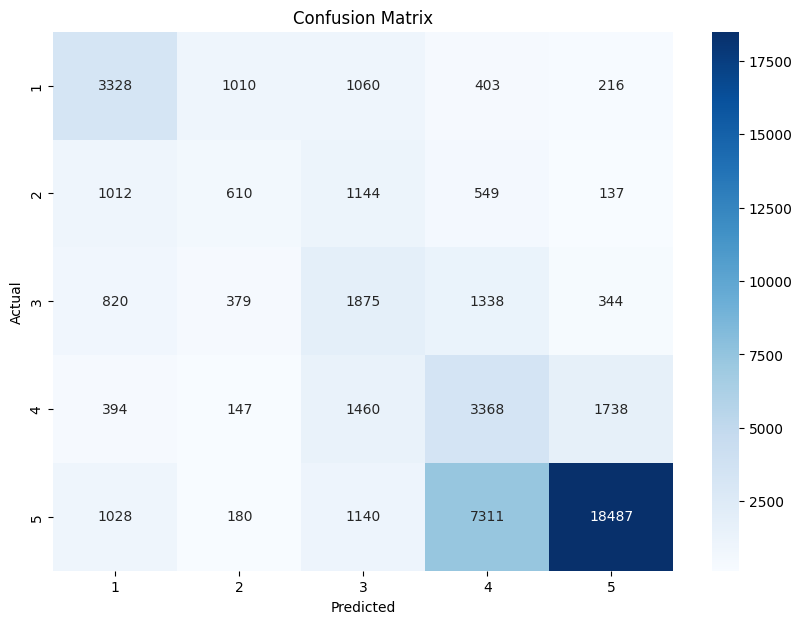

Precision: 0.6467252834368811
Accuracy: 0.5591980274061199
Recall: 0.5591980274061199
F1 Score: 0.5873444306257923


In [14]:
# Initialize and train the Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred.round())

# Calculate precision, accuracy, recall, and F1 score
precision = precision_score(y_test, y_pred.round(), average='weighted')
accuracy = accuracy_score(y_test, y_pred.round())
recall = recall_score(y_test, y_pred.round(), average='weighted')
f1 = f1_score(y_test, y_pred.round(), average='weighted')

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix,xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5], annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("Precision:", precision)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)

In [20]:
# Test 2: Predict ratings for new reviews in the fashion dataset and analyze the results
new_reviews = [
    "love jacket may compliment jacket work nurse important jacket cute also look professional structure jacket ordered coworkers well order definitely tight",  # 5 star
    "run small run small great jacket",  # 4 star
    "plastic cheap ugly oh know 34 pu leather 34 meant plastic feel foolish",  # 1 star
    "great little bag okay first let say great little bag carry lot item however clashing mechanism close bag stay closed regardless much item stay snapped shut walking pocketbook wide open without even realizing throughout day bad thing little purse great little purse",  # 3 stars
]

new_embeddings = [get_embedding(review) for review in new_reviews]

# Reshape the embeddings
X_new = np.array(new_embeddings).reshape(len(new_reviews), 100)

predicted_ratings = nb_model.predict(X_new)
print("Predicted Ratings for New Reviews:")
for i, rating in enumerate(predicted_ratings):
  print(f"Review {i+1}: {rating}") # Access the rating directly, it's not nested in an array

Predicted Ratings for New Reviews:
Review 1: 4.0
Review 2: 3.0
Review 3: 1.0
Review 4: 3.0


# Random Forest

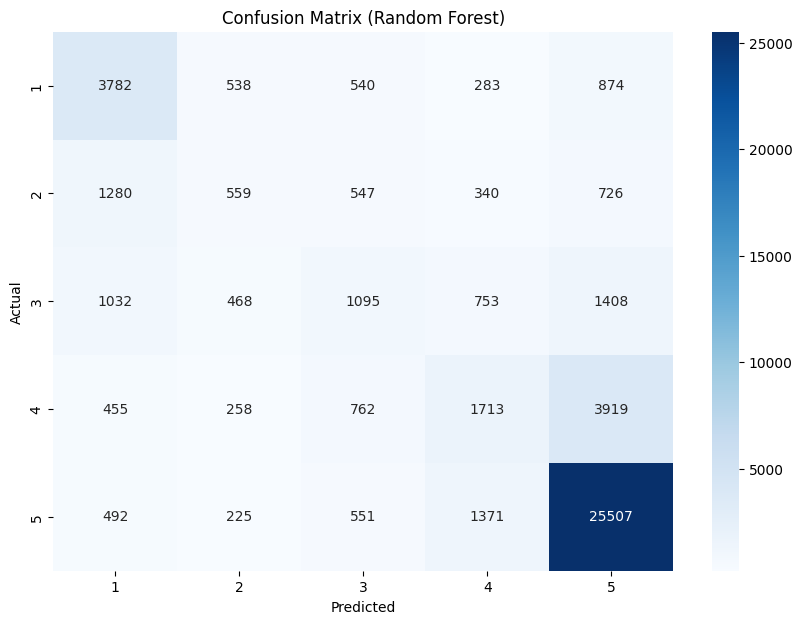

Random Forest - Precision: 0.6170161718436457
Random Forest - Accuracy: 0.6600105097214923
Random Forest - Recall: 0.6600105097214923
Random Forest - F1 Score: 0.6317155240486195


In [16]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=10,random_state=42)  # You can adjust hyperparameters here
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Calculate precision, accuracy, recall, and F1 score
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf, xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5], annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

print("Random Forest - Precision:", precision_rf)
print("Random Forest - Accuracy:", accuracy_rf)
print("Random Forest - Recall:", recall_rf)
print("Random Forest - F1 Score:", f1_rf)

In [17]:
# Test 2: Predict ratings for new reviews in the fashion dataset and analyze the results
new_reviews = [
    "love jacket may compliment jacket work nurse important jacket cute also look professional structure jacket ordered coworkers well order definitely tight",  # 5 star
    "run small run small great jacket",  # 4 star
    "plastic cheap ugly oh know 34 pu leather 34 meant plastic feel foolish",  # 1 star
    "great little bag okay first let say great little bag carry lot item however clashing mechanism close bag stay closed regardless much item stay snapped shut walking pocketbook wide open without even realizing throughout day bad thing little purse great little purse",  # 3 stars
]

new_embeddings = [get_embedding(review) for review in new_reviews]

# Reshape the embeddings
X_new = np.array(new_embeddings).reshape(len(new_reviews), 100)

predicted_ratings = rf_model.predict(X_new)
print("Predicted Ratings for New Reviews:")
for i, rating in enumerate(predicted_ratings):
  print(f"Review {i+1}: {rating}") # Access the rating directly, it's not nested in an array

Predicted Ratings for New Reviews:
Review 1: 5.0
Review 2: 4.0
Review 3: 1.0
Review 4: 3.0


# Logistic Regression


c:\Users\rperi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


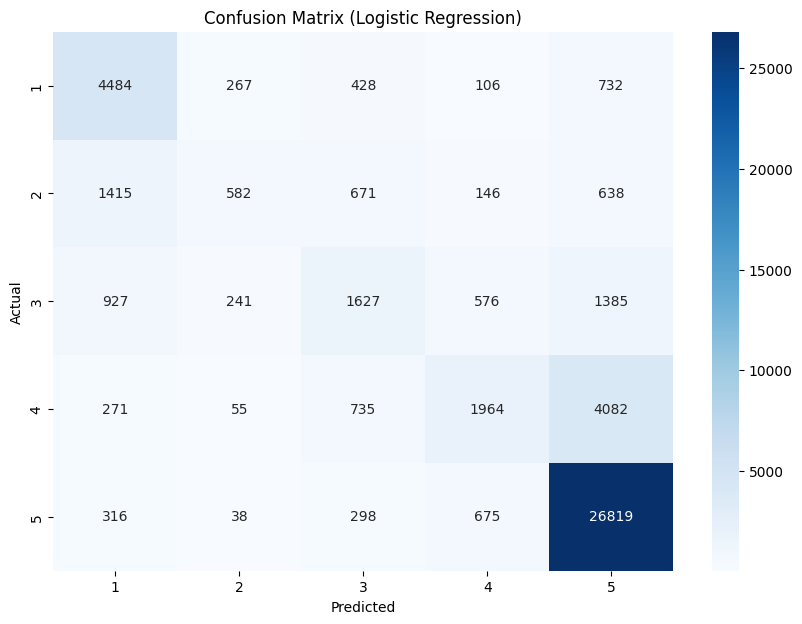

Logistic Regression - Precision: 0.6841568787233394
Logistic Regression - Accuracy: 0.7170055378147864
Logistic Regression - Recall: 0.7170055378147864
Logistic Regression - F1 Score: 0.6825323946953816


In [18]:

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, multi_class='multinomial') # Increased max_iter
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Calculate the confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Calculate precision, accuracy, recall, and F1 score
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
accuracy_lr = accuracy_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_lr, xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5], annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

print("Logistic Regression - Precision:", precision_lr)
print("Logistic Regression - Accuracy:", accuracy_lr)
print("Logistic Regression - Recall:", recall_lr)
print("Logistic Regression - F1 Score:", f1_lr)

In [19]:
# Test 2: Predict ratings for new reviews in the fashion dataset and analyze the results
new_reviews = [
    "love jacket may compliment jacket work nurse important jacket cute also look professional structure jacket ordered coworkers well order definitely tight",  # 5 star
    "run small run small great jacket",  # 4 star
    "plastic cheap ugly oh know 34 pu leather 34 meant plastic feel foolish",  # 1 star
    "great little bag okay first let say great little bag carry lot item however clashing mechanism close bag stay closed regardless much item stay snapped shut walking pocketbook wide open without even realizing throughout day bad thing little purse great little purse",  # 3 stars
]

new_embeddings = [get_embedding(review) for review in new_reviews]

# Reshape the embeddings
X_new = np.array(new_embeddings).reshape(len(new_reviews), 100)

predicted_ratings = lr_model.predict(X_new)
print("Predicted Ratings for New Reviews:")
for i, rating in enumerate(predicted_ratings):
  print(f"Review {i+1}: {rating}") # Access the rating directly, it's not nested in an array

Predicted Ratings for New Reviews:
Review 1: 5.0
Review 2: 4.0
Review 3: 1.0
Review 4: 5.0
